Python version = 3.7.16

In [35]:
%pip install radiomics dicom_numpy pydicom plotly matplotlib scikit-image

Note: you may need to restart the kernel to use updated packages.


In [36]:
import os
import glob
import numpy as np
import pandas as pd
import pydicom
import dicom_numpy
import radiomics

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure, morphology
from skimage.morphology import ball, binary_closing
from skimage.measure import label, regionprops


In [37]:
DICOM_PATH = '../../Dataset/Duke MRI/manifest-1654812109500/Duke-Breast-Cancer-MRI/Breast_MRI_001/01-01-1990-NA-MRI BREAST BILATERAL WWO-97538/3.000000-ax dyn pre-93877/'

In [38]:
dicom_file_list = glob.glob(DICOM_PATH + '*.dcm')

In [39]:
type(dicom_file_list)

list

In [40]:
def extract_voxel_data(list_of_dicom_files):
    datasets = [pydicom.read_file(f) for f in sorted(list_of_dicom_files)]
    try:
        voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(datasets)
    except dicom_numpy.DicomImportException as e:
        # invalid DICOM data
        raise
    return voxel_ndarray
myvoxel = extract_voxel_data(dicom_file_list)
myvoxel.shape

(448, 448, 160)

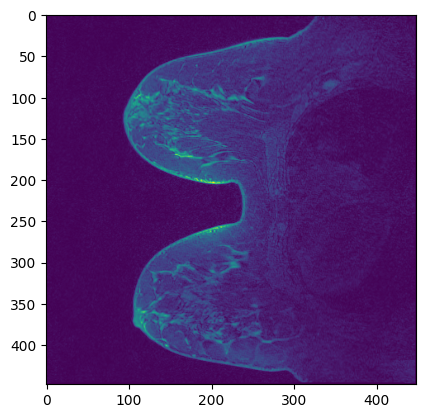

In [41]:
plt.imshow(myvoxel[:, :, 70])

In [42]:
(myvoxel.nbytes) / 10**6

64.22528

In [43]:
annotation_box = pd.read_excel('../../Dataset/Annotation_Boxes.xlsx')
annotation_box.iloc[0]

Patient ID      Breast_MRI_001
Start Row                  234
End Row                    271
Start Column               308
End Column                 341
Start Slice                 89
End Slice                  112
Name: 0, dtype: object